Load the Complete Evaluation Table and aggregate the Absolute Errors by Mean --> generating MAE

In [1]:
import pandas as pd

# We concatenate the evaluation results of the quantifiers and the ensemble quantifier
# to have a single table for the evaluation results

# EXPERIMENT 1
# Meta-features extraidas de full set, sem normalização
# Quantificadores treinados em train set, com zscore
# Quantificadores avaliados em test set, com zscore

# EXPERIMENT 2
# Meta-features extraidas de train set, com zscore
# Quantificadores treinados em train set, com zscore
# Quantificadores avaliados em test set, com zscore

# EXPERIMENT 3 (AINDA NÃO FEITO)
# Meta-features extraidas de train set, sem normalização
# Quantificadores treinados em train set, com zscore
# Quantificadores avaliados em test set, com zscore

# path = "./plot_data/experiment-1/"

path = "./plot_data/"

quantifiers_eval = pd.read_csv(path+"reg_quantifiers_evaluation_table.csv")
reg_ensemble_quantifier_eval = pd.read_csv(path+"reg_ensemble_quantifier_evaluation_table.csv")
knn_ensemble_quantifier_eval = pd.read_csv(path+"knn_ensemble_quantifier_evaluation_table.csv")
eval_table = pd.concat([quantifiers_eval, reg_ensemble_quantifier_eval, knn_ensemble_quantifier_eval], axis=0)


eval_table = eval_table.groupby(["quantifier", "dataset"]).agg(
        abs_error = pd.NamedAgg(column="abs_error", aggfunc="mean"),
        run_time = pd.NamedAgg(column="run_time", aggfunc="mean")
    )
eval_table.reset_index(inplace=True)

def remove_quantifiers(df, quantifiers):
    return df[~df['quantifier'].isin(quantifiers)]

quantifiers_to_remove = [
    # '(KNN)Top-1',
    '(KNN)Top-2',
    '(KNN)Top-3',
    '(KNN)Top-4',
    '(KNN)Top-5',
    '(KNN)Top-6',
    '(KNN)Top-7',
    '(KNN)Top-8',
    '(KNN)Top-9',
    '(KNN)Top-10',
    '(KNN)Top-11',
    '(KNN)Top-1+W',
    '(KNN)Top-2+W',
    '(KNN)Top-3+W',
    '(KNN)Top-4+W',
    '(KNN)Top-5+W',
    '(KNN)Top-6+W',
    '(KNN)Top-7+W',
    '(KNN)Top-8+W',
    '(KNN)Top-9+W',
    '(KNN)Top-10+W',
    '(KNN)Top-11+W',
    '(REG)Top-1',
    '(REG)Top-2',
    '(REG)Top-3',
    '(REG)Top-4',
    '(REG)Top-5',
    '(REG)Top-6',
    '(REG)Top-7',
    '(REG)Top-8',
    '(REG)Top-9',
    '(REG)Top-10',
    '(REG)Top-11',
    '(REG)Top-1+W',
    '(REG)Top-2+W',
    '(REG)Top-3+W',
    '(REG)Top-4+W',
    '(REG)Top-5+W',
    '(REG)Top-6+W',
    '(REG)Top-7+W',
    '(REG)Top-8+W',
    '(REG)Top-9+W',
    '(REG)Top-10+W',
    '(REG)Top-11+W',
]
eval_table = remove_quantifiers(eval_table, quantifiers_to_remove)

Generate Ranking Plots by Error

,quantifier,dataset,abs_error,run_time,error_rank
0,(KNN)Top-1,679_rmftsa_sleepdata,0.098512,0.007668,2.0
1,(KNN)Top-1,balance-scale,0.014066,0.007407,2.0
2,(KNN)Top-1,threeOf9,0.030633,0.008065,10.0
18,(KNN)Top-12,679_rmftsa_sleepdata,0.124716,0.122052,7.0
19,(KNN)Top-12,balance-scale,0.019012,0.093320,12.0
...,...,...,...,...,...
220,T50,balance-scale,0.040800,0.009755,28.0
221,T50,threeOf9,0.048150,0.008232,28.0
222,X,679_rmftsa_sleepdata,0.286150,0.014451,27.0
223,X,balance-scale,0.017400,0.009598,4.0


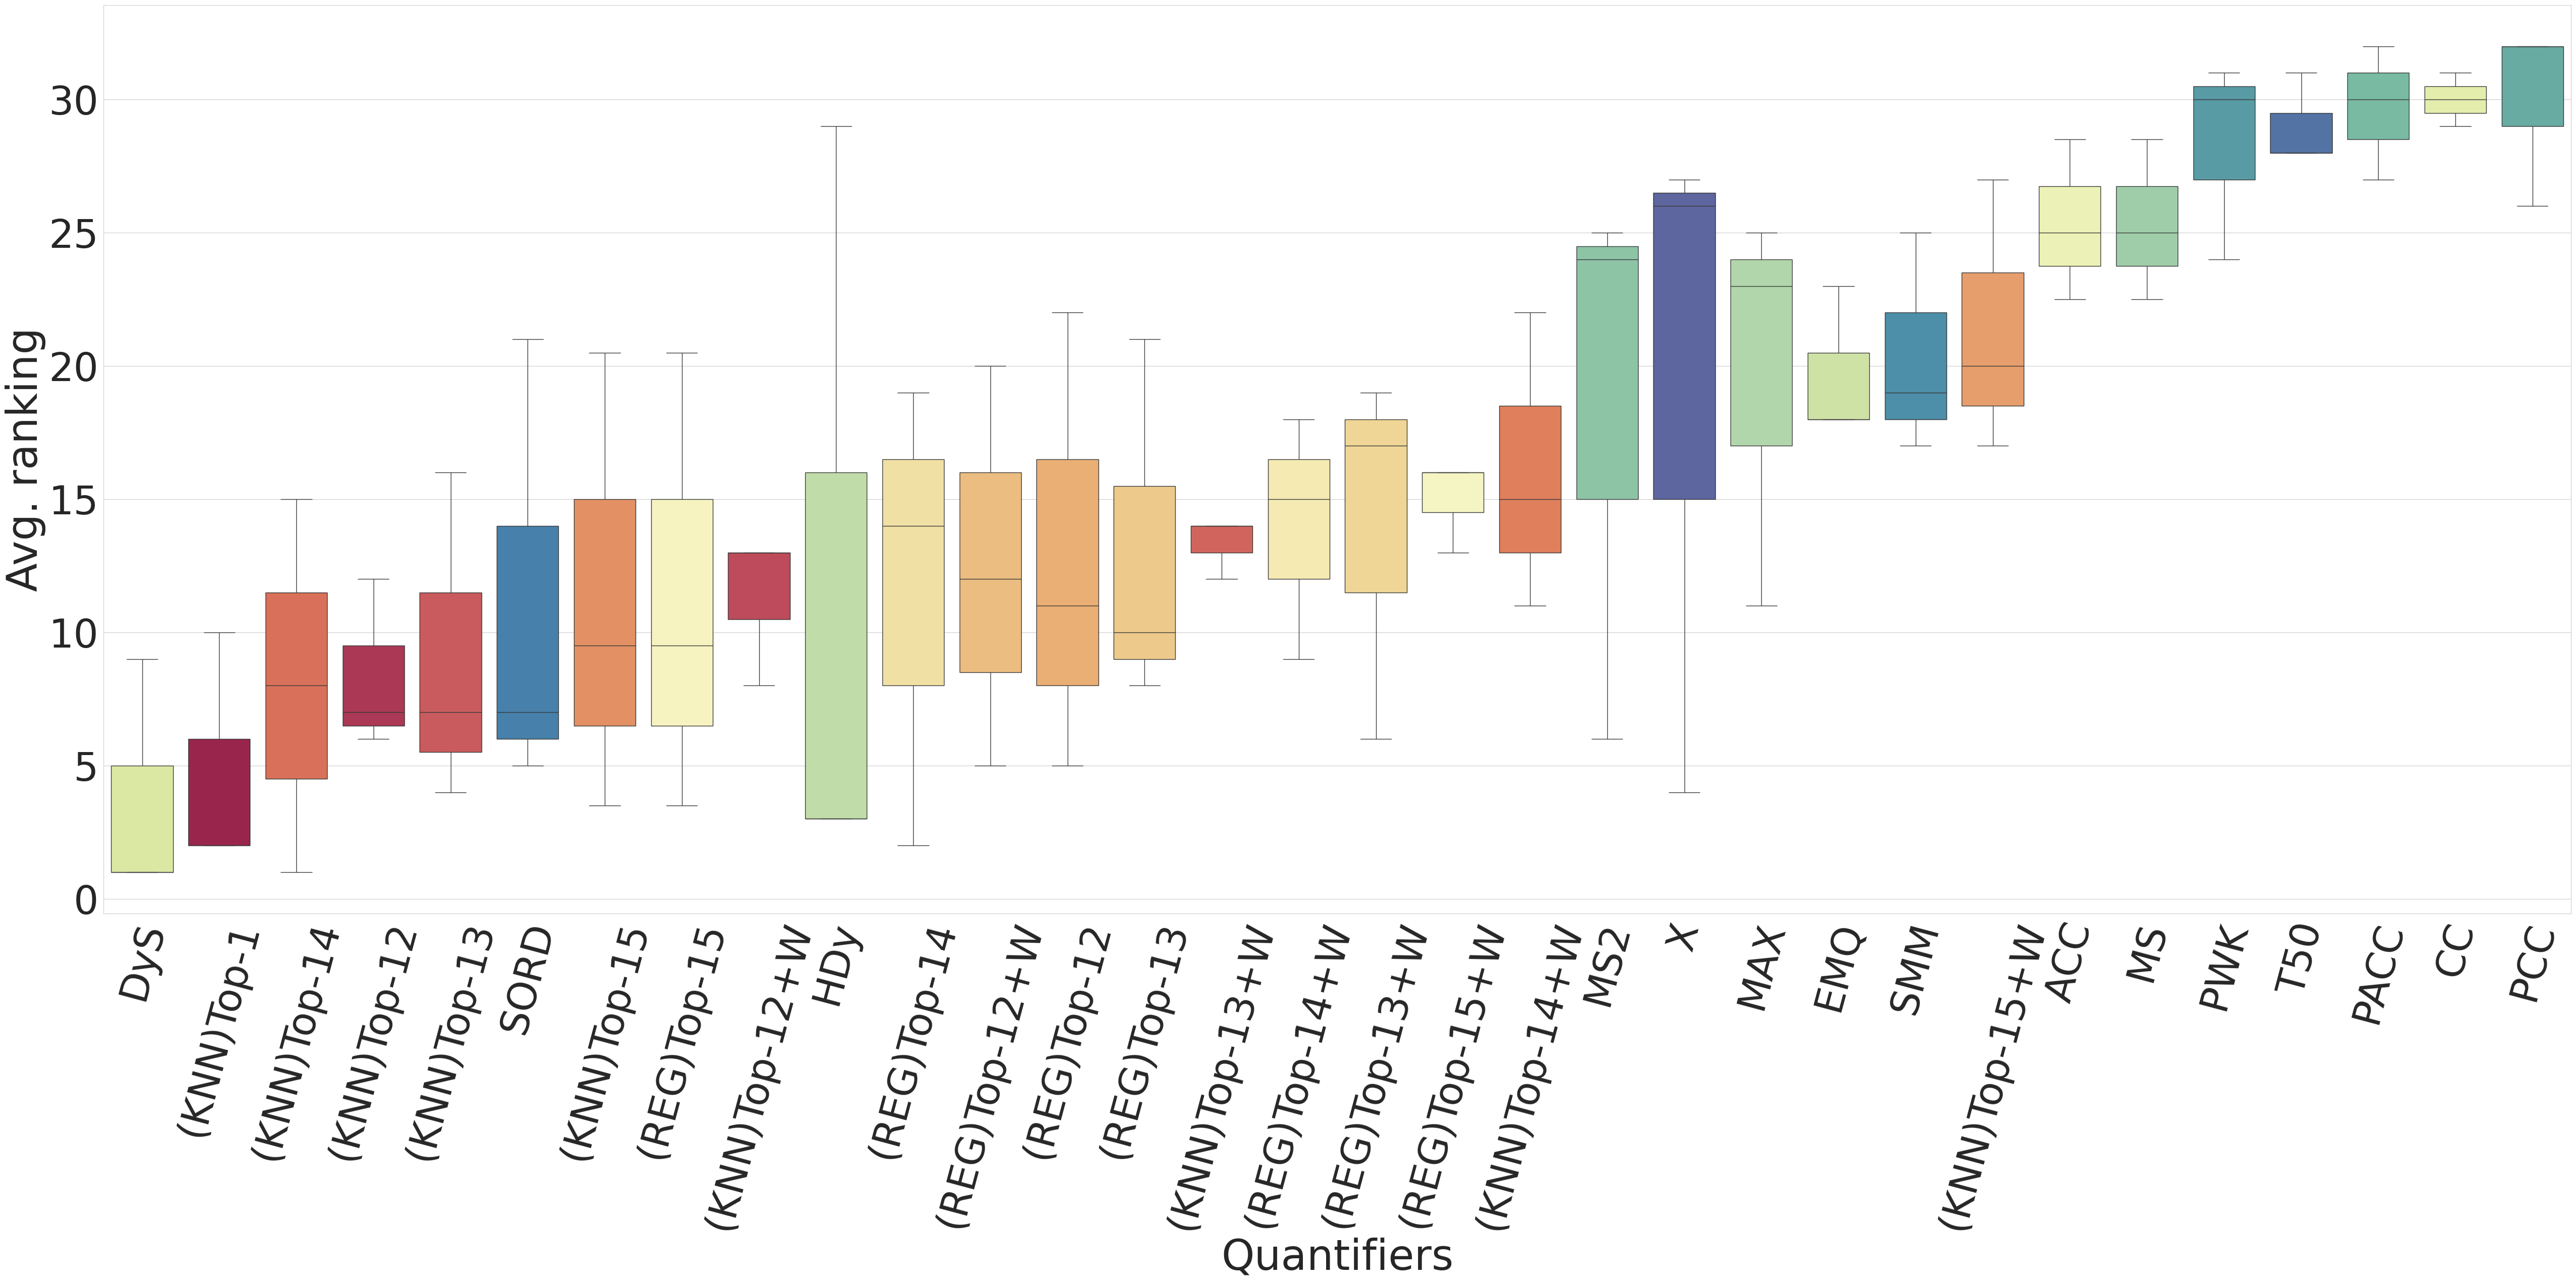

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

margin_left = 0.05
margin_right= 0.99
margin_top = 0.99
margin_bottom = .24 # .23
plt_width = 52 # 38
plt_heigth = 24 # 18
plot_rotation = 75
axis_font_size = 56 # 50
labels_size = 60 # 60

def boxplotMae(sample, file=""):
    sample['error_rank'] = sample.groupby(['dataset'], as_index=False )['abs_error'].rank(method='average', ascending = True)

    order = sample.groupby('quantifier')['error_rank'].mean().sort_values().index

    palette = sns.color_palette('Spectral', sample['quantifier'].nunique())

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(plt_width, plt_heigth))
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        ax=sns.boxplot(data=sample, x='quantifier', y='error_rank', order = order, palette = palette, hue='quantifier', legend=False)

        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Avg. ranking",fontsize=labels_size)

    # plt.show()
    if file != "":
        ax.figure.savefig('./results/'+file+ '.pdf', format="pdf", facecolor='w')

    return sample

boxplotMae(eval_table, file="boxplot_mae")

# R^2

R^2 value for DyS: -1.3379627163969419
R^2 value for SMM: -1.0265646460167854
R^2 value for EMQ: -0.9020322580124529
R^2 value for X: -0.8345940313135918
R^2 value for SORD: -1.0482950253629455
R^2 value for MS: -0.9694066906010008
R^2 value for MAX: -1.1951437751929044
R^2 value for MS2: -1.1524255709237554
R^2 value for ACC: -0.93994749844284
R^2 value for HDy: -1.2970428948360384
R^2 value for T50: -1.1460008057701616
R^2 value for PACC: -0.9897684452583115
R^2 value for PWK: -0.7808841966401834
R^2 value for CC: -1.0965472585906775
R^2 value for PCC: -1.2533444466141792


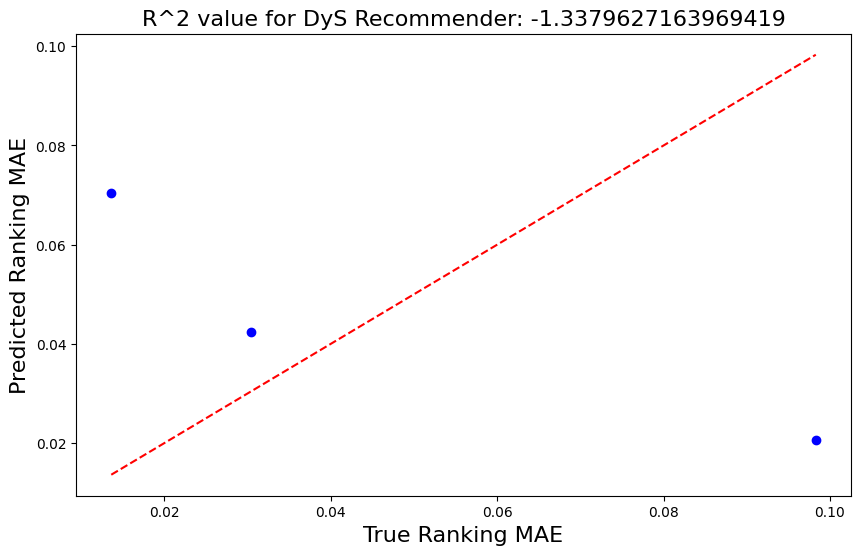

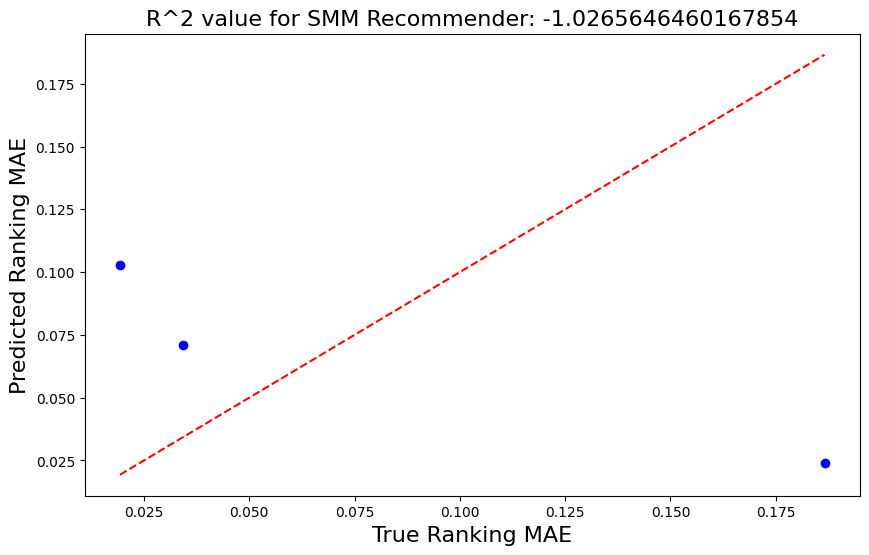

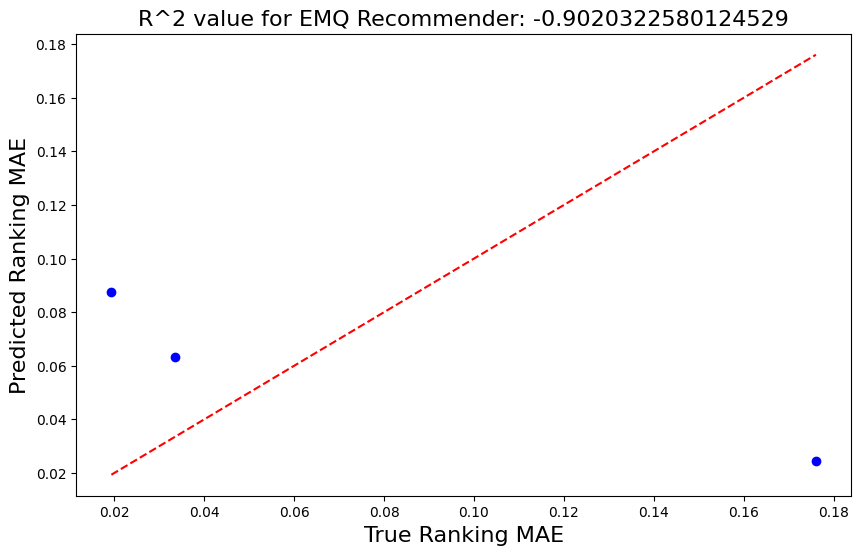

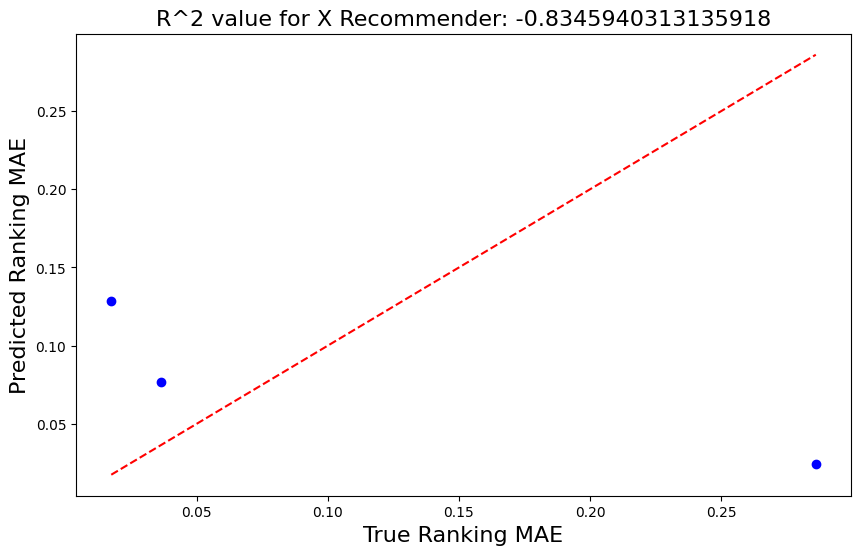

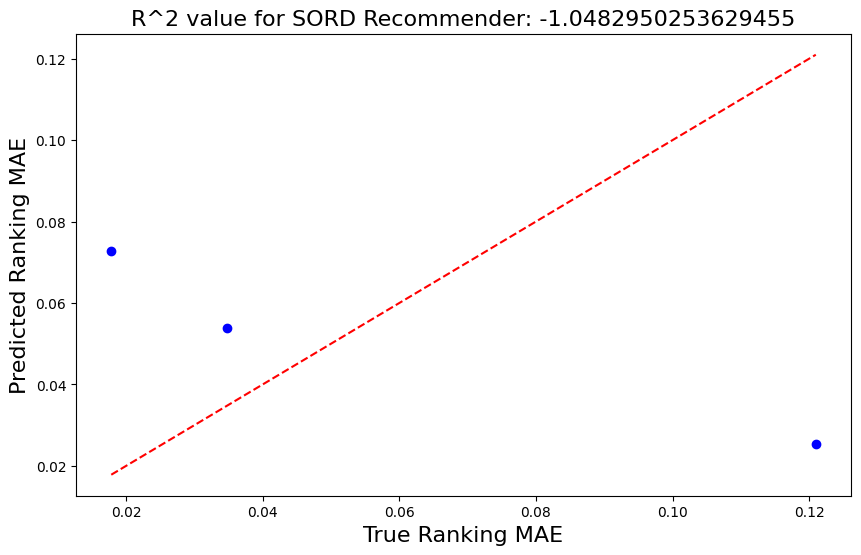

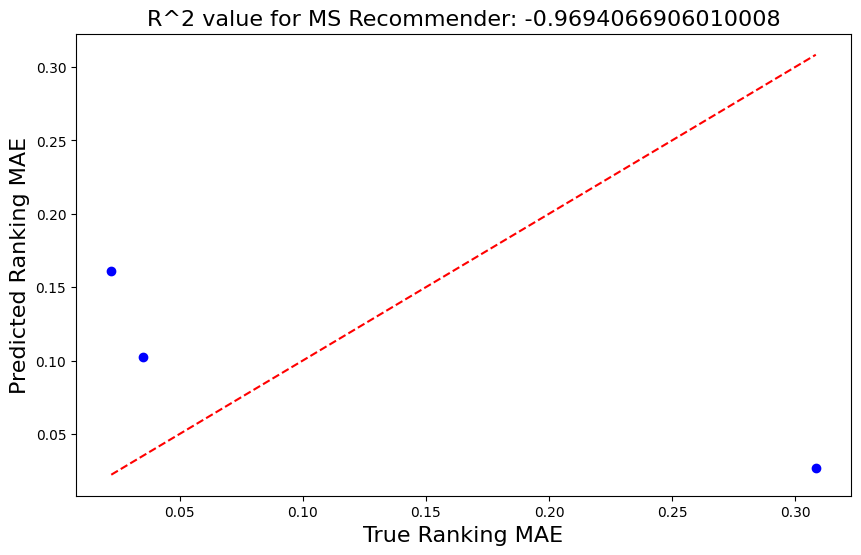

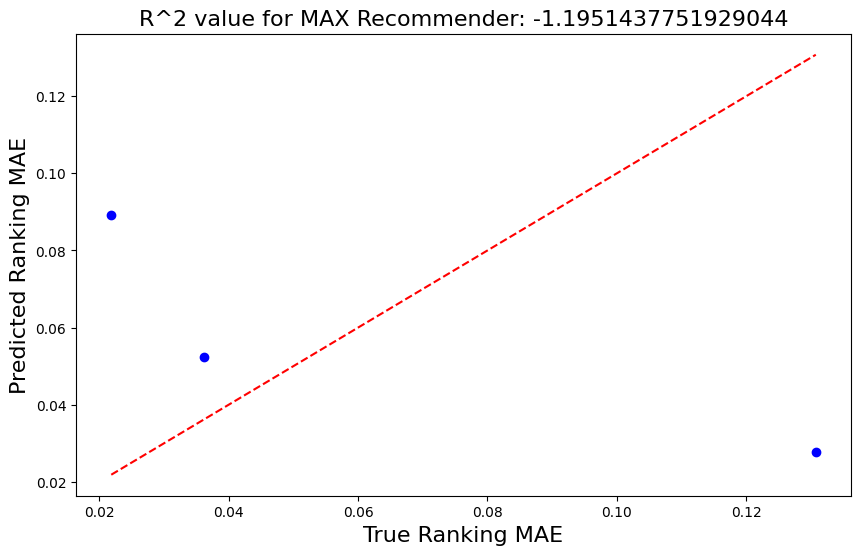

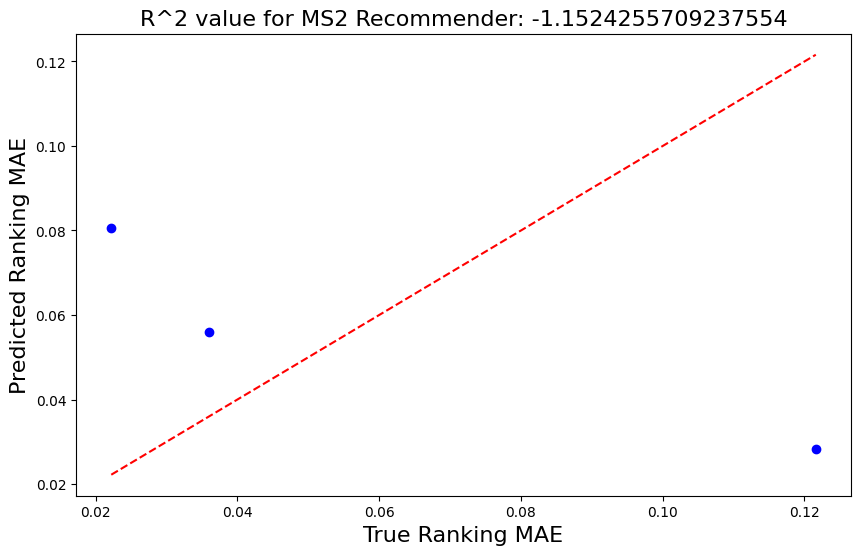

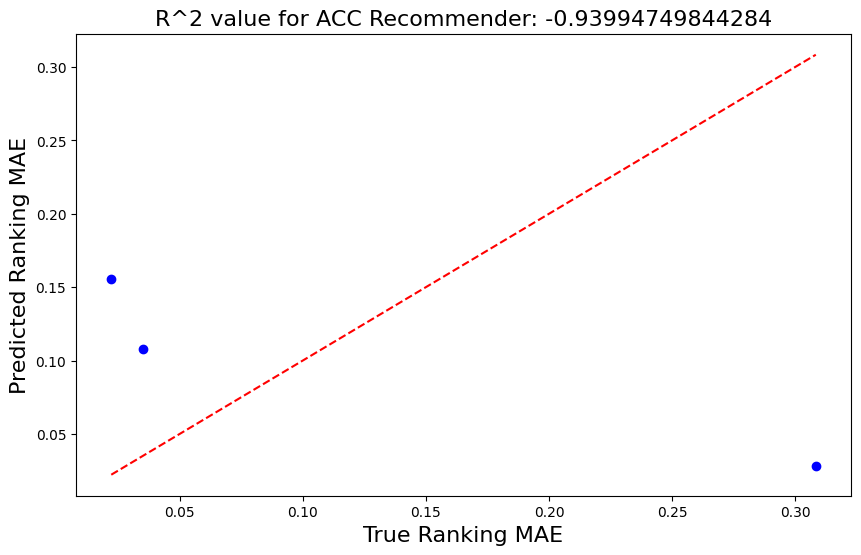

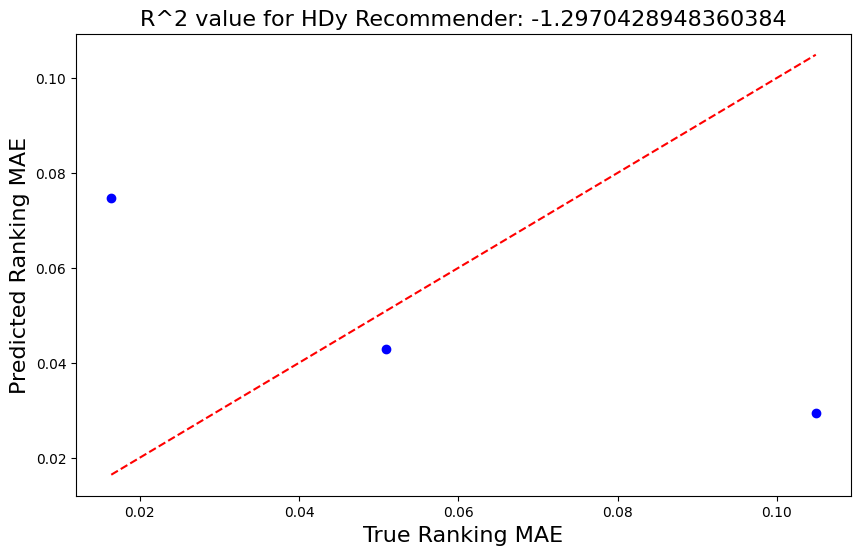

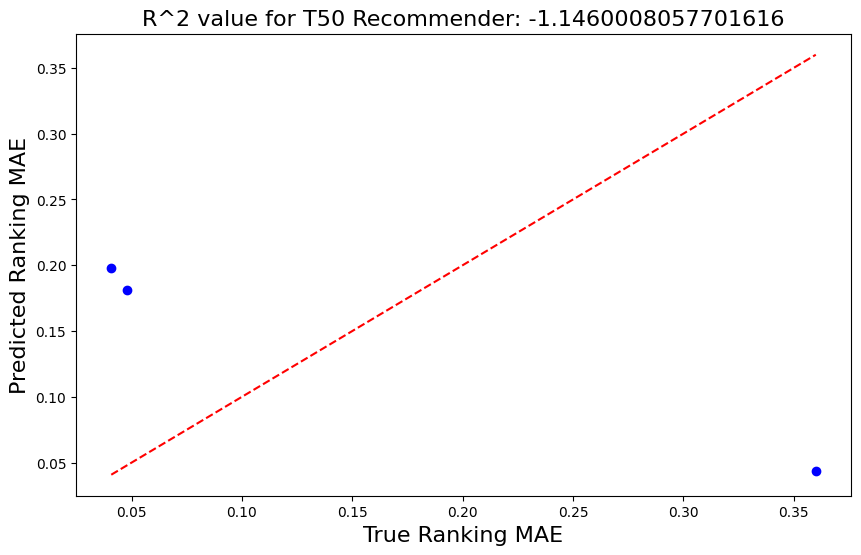

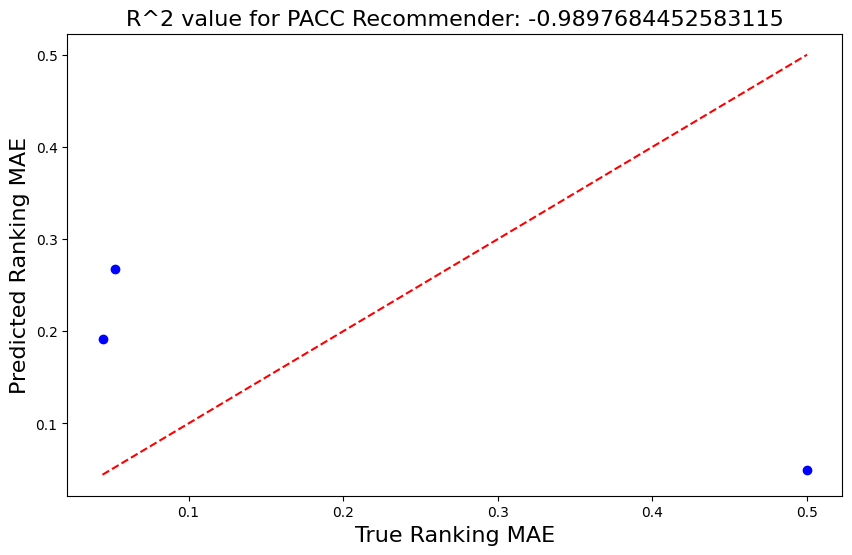

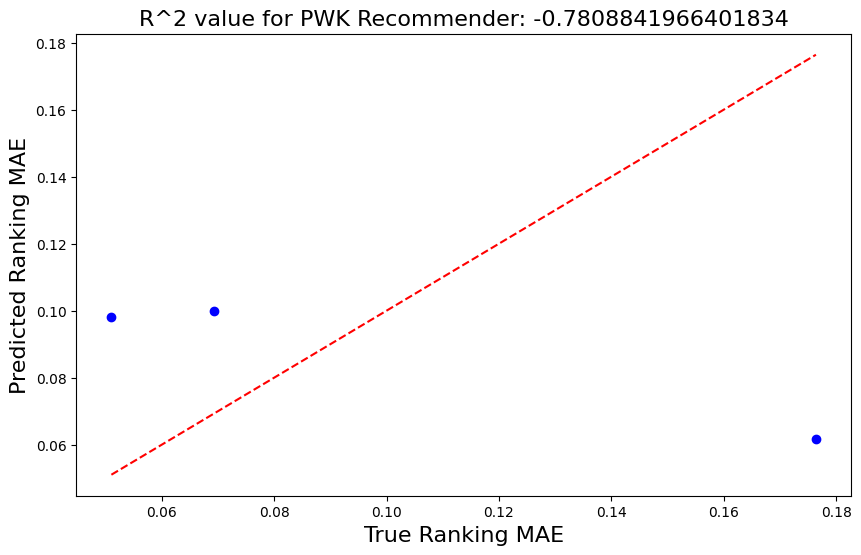

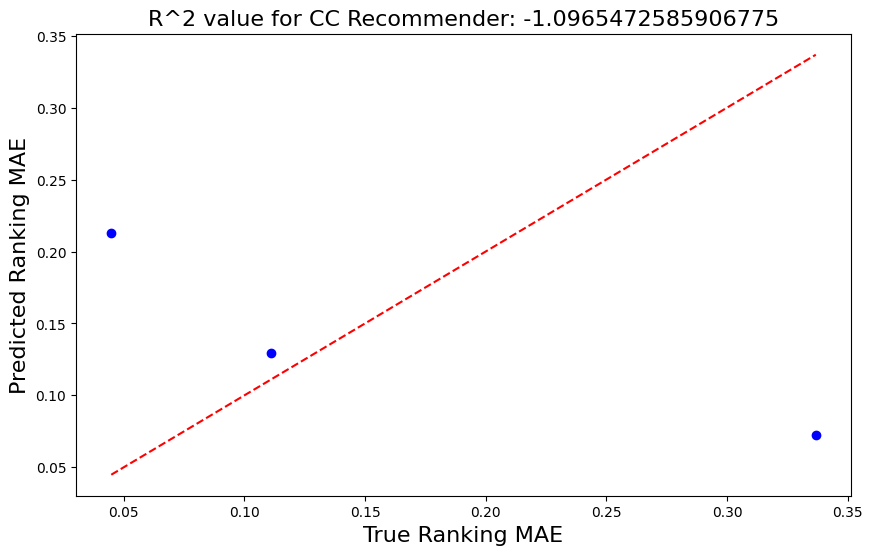

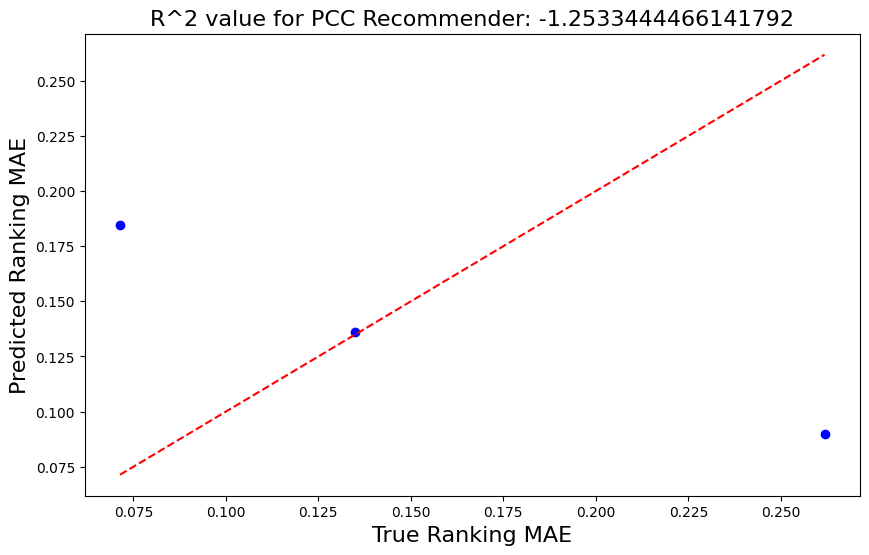

In [3]:
import pandas as pd
from sklearn.metrics import r2_score

# path = "./plot_data/experiment-1/"
path = "./plot_data/"


reg_ensemble_quantifier_eval = pd.read_csv(path+"reg_recommender_evaluation_table.csv", index_col=0)
knn_ensemble_quantifier_eval = pd.read_csv(path+"knn_recommender_evaluation_table.csv", index_col=0)



qtf_list = reg_ensemble_quantifier_eval['predicted_ranking'].apply(eval).iloc[0]
qtf_dict = {qtf: {"predicted": [], "true": []} for qtf in qtf_list}



reg_ensemble_quantifier_eval['predicted_ranking'] = reg_ensemble_quantifier_eval['predicted_ranking'].apply(eval)
reg_ensemble_quantifier_eval['true_ranking'] = reg_ensemble_quantifier_eval['true_ranking'].apply(eval)
reg_ensemble_quantifier_eval['predicted_ranking_mae'] = reg_ensemble_quantifier_eval['predicted_ranking_mae'].apply(eval)
reg_ensemble_quantifier_eval['true_ranking_mae'] = reg_ensemble_quantifier_eval['true_ranking_mae'].apply(eval)

knn_ensemble_quantifier_eval['predicted_ranking'] = knn_ensemble_quantifier_eval['predicted_ranking'].apply(eval)
knn_ensemble_quantifier_eval['true_ranking'] = knn_ensemble_quantifier_eval['true_ranking'].apply(eval)
knn_ensemble_quantifier_eval['predicted_ranking_arr'] = knn_ensemble_quantifier_eval['predicted_ranking_arr'].apply(eval)
knn_ensemble_quantifier_eval['true_ranking_arr'] = knn_ensemble_quantifier_eval['true_ranking_arr'].apply(eval)

for i in range(len(reg_ensemble_quantifier_eval)):
    row = reg_ensemble_quantifier_eval.iloc[i]

    predicted_ranking = row['predicted_ranking']
    predicted_ranking_mae = row['predicted_ranking_mae']
    true_ranking = row['true_ranking']
    true_ranking_mae = row['true_ranking_mae']

    for qtf, mae in zip(predicted_ranking, predicted_ranking_mae):
        qtf_dict[qtf]['predicted'].append(mae)

    for qtf, mae in zip(true_ranking, true_ranking_mae):
        qtf_dict[qtf]['true'].append(mae)

for key, value in qtf_dict.items():
    quantifier = key
    predicted_ranking_mae = value['predicted']
    true_ranking_mae = value['true']

    r2 = r2_score(true_ranking_mae, predicted_ranking_mae)
    print(f"R^2 value for {quantifier}: {r2}")

    plt.figure(figsize=(10, 6))
    plt.scatter(true_ranking_mae, predicted_ranking_mae, color='blue')
    plt.plot([min(true_ranking_mae), max(true_ranking_mae)], [min(true_ranking_mae), max(true_ranking_mae)], color='red', linestyle='--')
    plt.xlabel('True Ranking MAE', fontsize=16)
    plt.ylabel('Predicted Ranking MAE', fontsize=16)
    plt.title(f'R^2 value for {quantifier} Recommender: {r2}', fontsize=16)

    pdf_filename = f"./results/{quantifier}_recommender_performance.pdf"
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

    # plt.show()